#### Author: Ali Ahmed

# Time Series Analysis of Twitter stock prices using a Machine Learning Model

In this project, we will be using various python and data science libraries to make a time series analysis of Twitter stocks.

## 1. Define the problem

> Perform a time series analysis on Twitter stocks and make a machine learning model. If possible, forecast whether the stock price will go into an uptrend or downtrend

## 2. Data

The dataset was downloaded from Kaggle. The link to the dataset is: https://www.kaggle.com/datasets/maharshipandya/twitter-stocks-dataset?select=twitter-stocks.csv

## 3. Evaluation

> If I can reach a >90% value in my prediction and identify a trend, I'll further evaluate the project

## 4. Features

This is where you'll find the features of this dataset:

There are 7 columns in this dataset.

> Note: The currency is in USD ($)

- Date: The date for which the stock data is considered.
- Open: The stock's opening price on that day.
- High: The stock's highest price on that day.
- Low: The stock's lowest price on that day.
- Close: The stock's closing price on that day. The close price is adjusted for splits.
- Adj Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
- Volume: Volume measures the number of shares traded in a stock or contracts traded in futures or options.

In [288]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

### Load Data

In [289]:
# read csv
df = pd.read_csv('twitter-stocks.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.7+ KB


In [291]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [292]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [293]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0


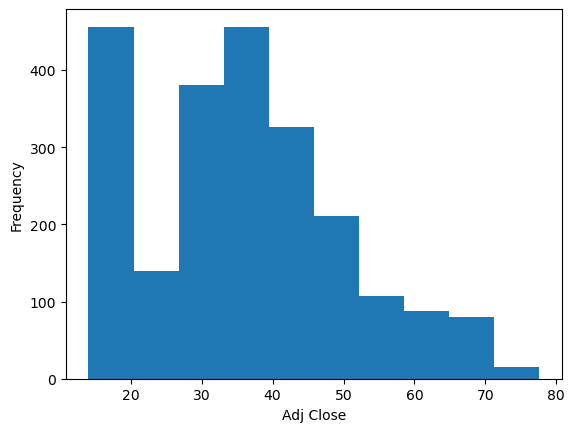

In [294]:
df['Adj Close'].plot.hist();
plt.xlabel('Adj Close');
plt.ylabel('Frequency');

### Sort the dataset by `Date`

When working with time-series datasets, it's a good idea to sort it by date.

In [295]:
# Sort the dataframe in data order
df.sort_values(by=["Date"], inplace=True, ascending=False)
df.Date.head(20)

2258    2022-10-27
2257    2022-10-26
2256    2022-10-25
2255    2022-10-24
2254    2022-10-21
2253    2022-10-20
2252    2022-10-19
2251    2022-10-18
2250    2022-10-17
2249    2022-10-14
2248    2022-10-13
2247    2022-10-12
2246    2022-10-11
2245    2022-10-10
2244    2022-10-07
2243    2022-10-06
2242    2022-10-05
2241    2022-10-04
2240    2022-10-03
2239    2022-09-30
Name: Date, dtype: object

In [296]:
df.Date.tail(20)

19    2013-12-05
18    2013-12-04
17    2013-12-03
16    2013-12-02
15    2013-11-29
14    2013-11-27
13    2013-11-26
12    2013-11-25
11    2013-11-22
10    2013-11-21
9     2013-11-20
8     2013-11-19
7     2013-11-18
6     2013-11-15
5     2013-11-14
4     2013-11-13
3     2013-11-12
2     2013-11-11
1     2013-11-08
0     2013-11-07
Name: Date, dtype: object

In [297]:
# Convert the Date column to Year for easier analysis and create a new column
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [298]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Year
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0,2022
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0,2022
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0,2022
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0,2022
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0,2022
2253,2022-10-20,52.200001,52.700001,51.599998,52.439999,52.439999,25461019.0,2022
2252,2022-10-19,51.799999,52.160000,51.259998,51.830002,51.830002,10057928.0,2022
2251,2022-10-18,51.099998,52.099998,50.849998,51.779999,51.779999,18533907.0,2022
2250,2022-10-17,50.500000,50.900002,50.200001,50.740002,50.740002,14101270.0,2022
2249,2022-10-14,50.490002,50.865002,50.299999,50.450001,50.450001,10075908.0,2022


Now we can drop the date column and visualize the data by year

In [299]:
# Create a new dataframe with the mean Adj Close price for each year
df_year = df.groupby('Year').mean();
df_year

C:\Users\mailm\AppData\Local\Temp\ipykernel_46100\2161689704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Year').mean();


,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2013,49.208919,51.061892,47.847976,49.657568,49.657568,2.285666e+07
2014,45.614901,46.440702,44.626392,45.451508,45.451508,2.326785e+07
2015,35.408611,36.029926,34.739992,35.344325,35.344325,2.120063e+07
2016,17.573532,17.943352,17.233593,17.571111,17.571111,2.567749e+07
2017,17.804694,18.082206,17.565404,17.823506,17.823506,1.752994e+07
2018,32.830210,33.538748,32.116127,32.828526,32.828526,2.852057e+07
2019,35.580129,36.078513,35.078195,35.575476,35.575476,1.542558e+07
2020,37.161560,37.920670,36.440357,37.215771,37.215771,1.962157e+07
2021,60.111216,61.163795,58.939404,59.991746,59.991746,1.682145e+07


Text(0, 0.5, 'Adj Close Price')

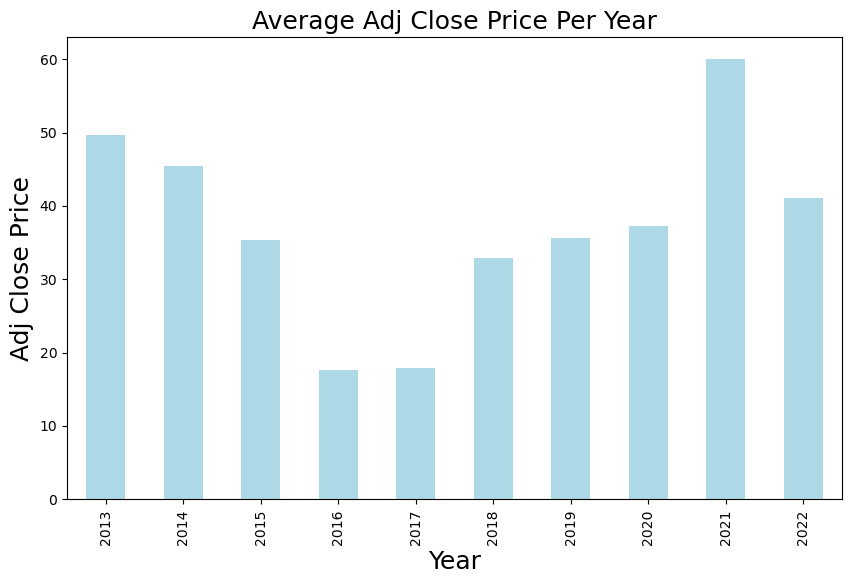

In [300]:
# Plot the dataframe
df_year['Adj Close'].plot(kind='bar', figsize=(10, 6), color='lightblue');

# Set the title and labels
plt.title('Average Adj Close Price Per Year', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)

As we can see, the stock price was highest in 2021 with 2016/2017 being the lowest values. There was also a decrease in the stocks in 2022.

The decrease in stocks could be due to the increased security issues.

Let's plot the highest vs lowest value for each year....

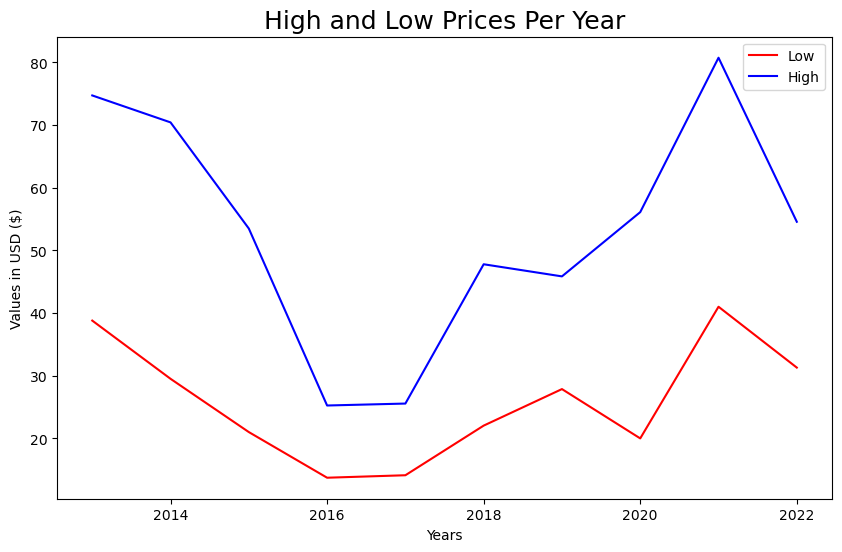

In [301]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('Year')['Low'].min(),'red')
plt.plot(df.groupby('Year')['High'].max(),'blue')
plt.title('High and Low Prices Per Year', fontsize=18)
plt.xlabel('Years')
plt.ylabel('Values in USD ($)')
plt.legend(['Low','High']);

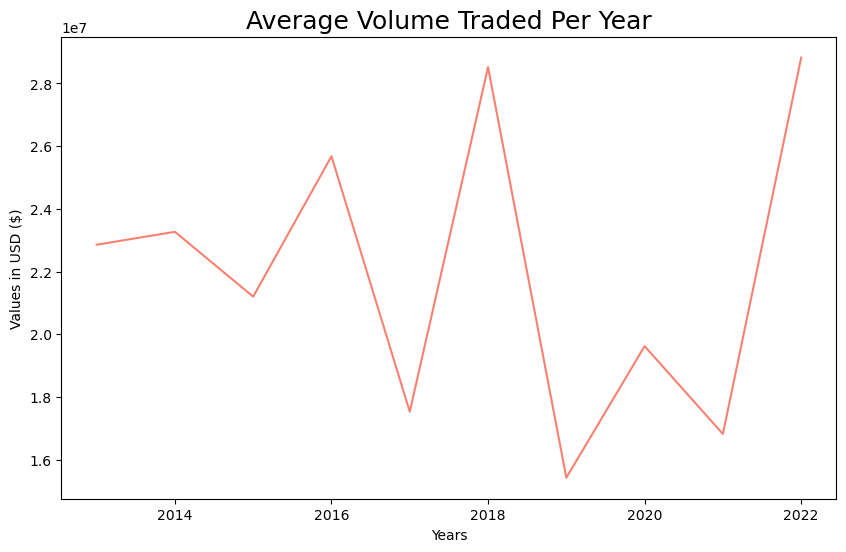

In [302]:
# create another figure to analyze the volume of stocks traded per year
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('Year')['Volume'].mean(),'salmon')
plt.title('Average Volume Traded Per Year', fontsize=18)
plt.xlabel('Years')
plt.ylabel('Values in USD ($)');

We can see from the figure that the average volume traded spiked from 2021 to 2022. 

> The could be due to buying pressure, as investor demand pushes the stock to higher and higher prices.

## 5. Prepare Data for Machine Learning

Let's start by plotting a scatter graph that shows the effect of opening and closing prices on volume of stocks traded...

In [303]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0,2022
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0,2022
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0,2022
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0,2022
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0,2022


Text(0, 0.5, 'High Price')

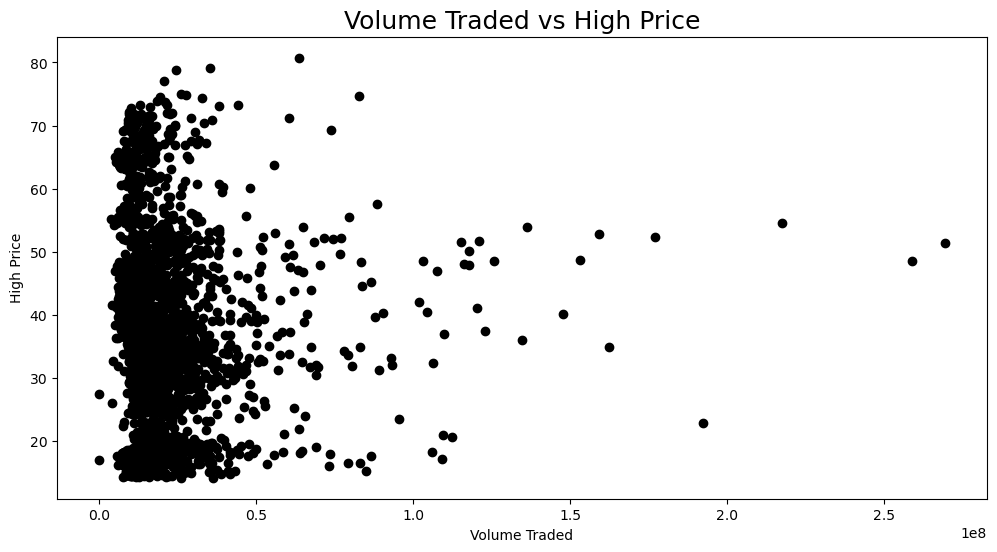

In [304]:
plt.figure(figsize=(12, 6))
plt.scatter(x='Volume', y='High', data=df, color='black')
plt.title('Volume Traded vs High Price', fontsize=18)
plt.xlabel('Volume Traded')
plt.ylabel('High Price')

Text(0, 0.5, 'Close Price')

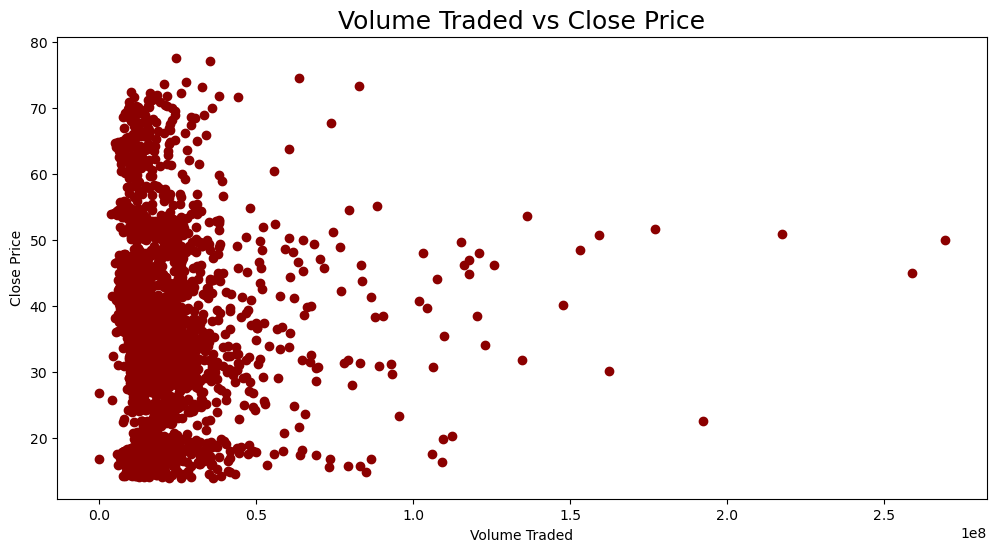

In [305]:
plt.figure(figsize=(12, 6))
plt.scatter(x='Volume', y='Close', data=df, color='darkred')
plt.title('Volume Traded vs Close Price', fontsize=18)
plt.xlabel('Volume Traded')
plt.ylabel('Close Price')

We can see the trend for both high and close price vs volume traded is very similar.

So how does volume really effect stocks?

> If there is buying pressure, it means the trading value for that stock is rising, similarly if the trading volume is falling it means the buying pressure is low and more investors are selling their shares.

C:\Users\mailm\AppData\Local\Temp\ipykernel_46100\1517703708.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Spectral')


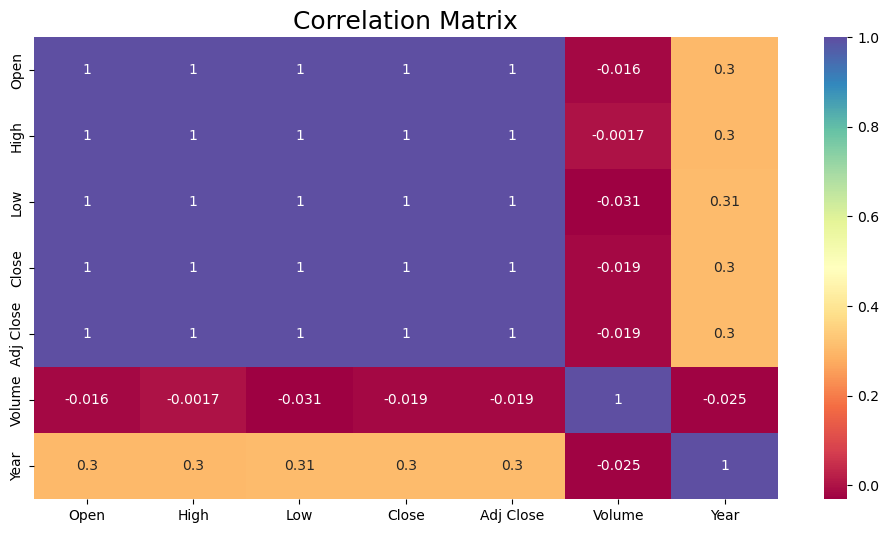

In [306]:
# create a correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix', fontsize=18);

Let's analyze the open values per year...

<AxesSubplot: xlabel='Year', ylabel='Open'>

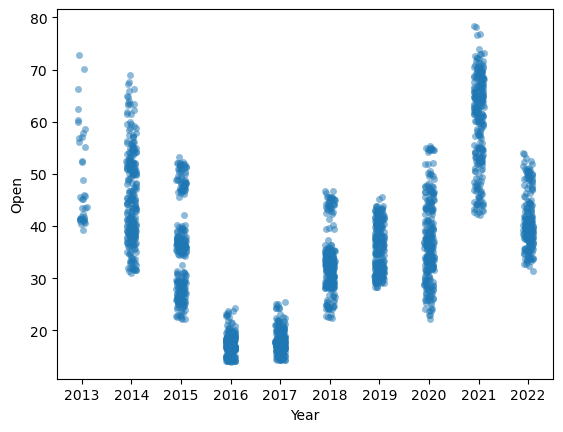

In [307]:
sns.stripplot(x='Year', y='Open', data=df, jitter=True, alpha=0.5)

We can see that the open price for 2021 was the highest amongst all other years, with the value decreasing in 2022.

We can anaylze this separately each year comparing the high vs close prices...

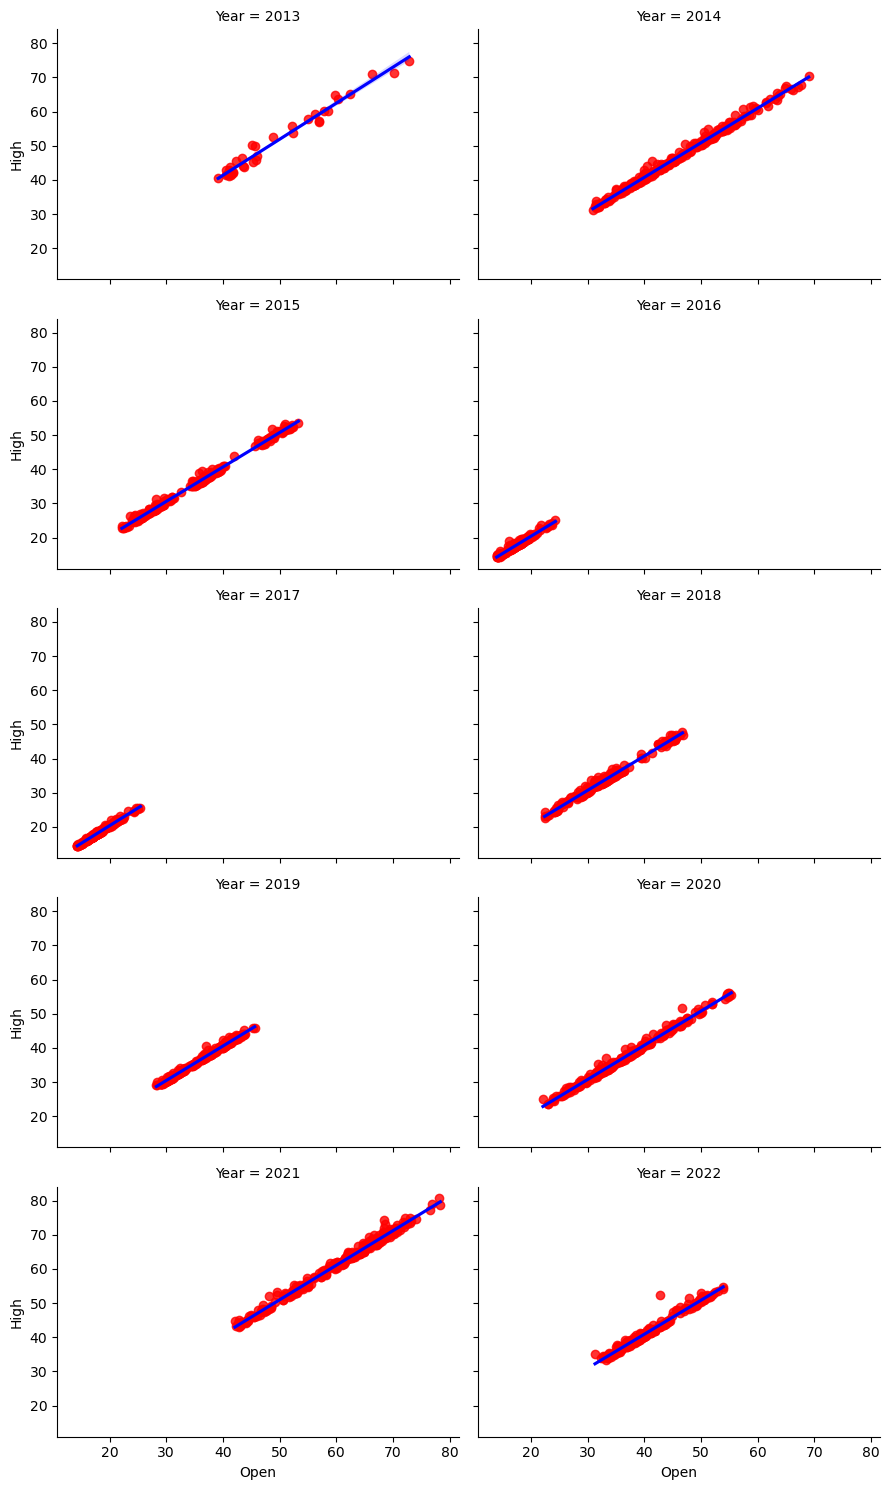

In [308]:
sns.lmplot(x='Open', y='High', data=df, col='Year', col_wrap=2, height=3, aspect=1.5, scatter_kws={'color':'red'}, line_kws={'color':'blue'});

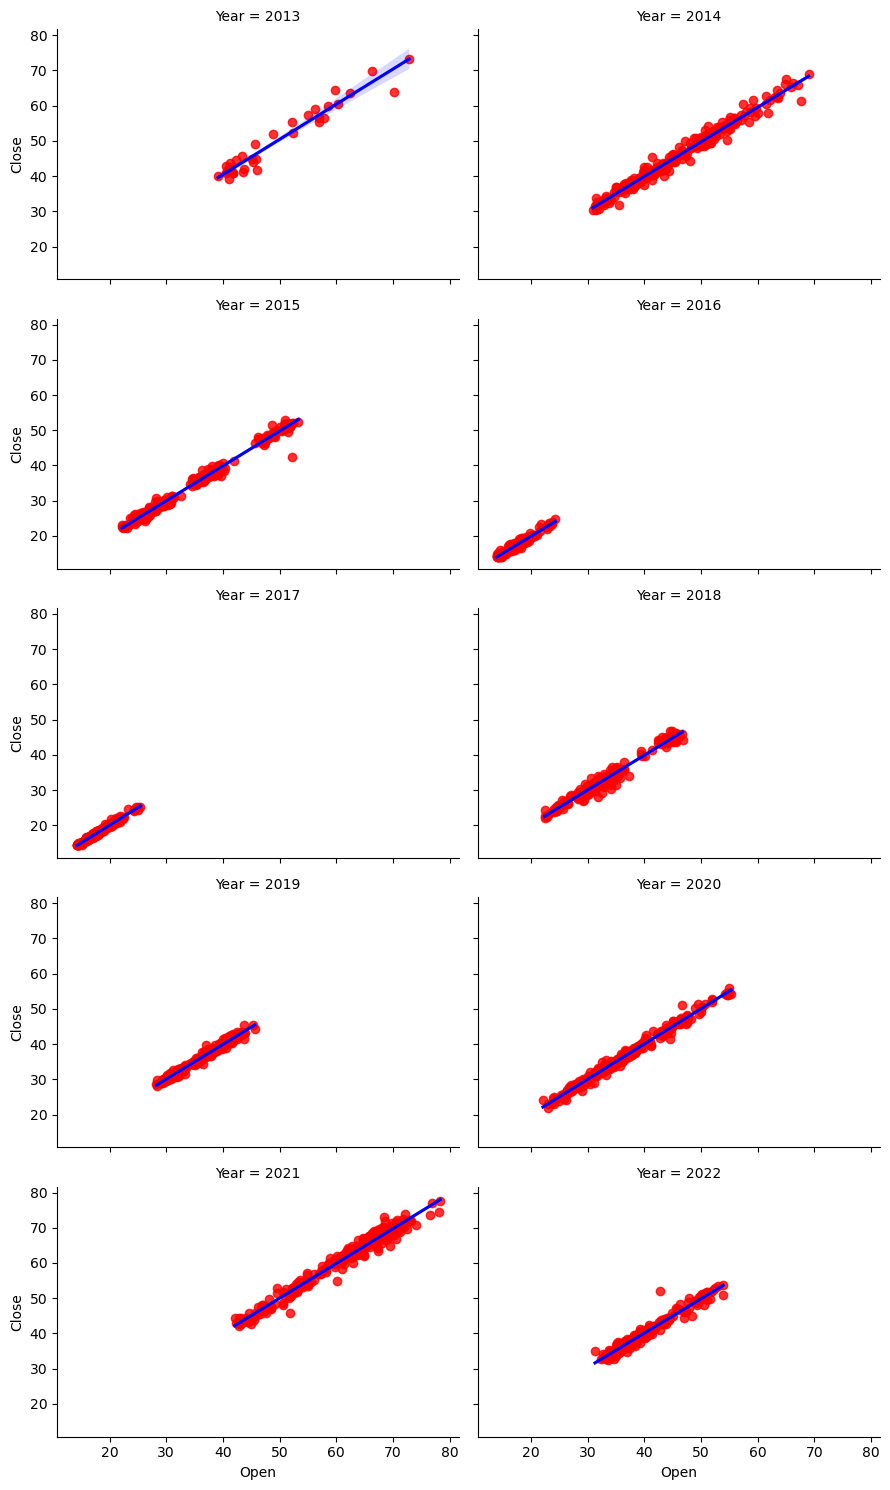

In [309]:
sns.lmplot(x='Open', y='Close', data=df, col='Year', col_wrap=2, height=3, aspect=1.5, scatter_kws={'color':'red'}, line_kws={'color':'blue'});

### Creating Training and Testing data

In [310]:
# import train_test_split function
from sklearn.model_selection import train_test_split

X = df.drop(['Date', 'Close', 'Adj Close', 'Year'], axis=1)
y = df['Close']

In [311]:
X.shape

(2259, 4)

In [312]:
y.shape

(2259,)

We will be using the `Close` column as our target variable.



In [313]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [314]:
X_train.shape

(1807, 4)

In [315]:
X_train.head(10)

,Open,High,Low,Volume
2249,50.490002,50.865002,50.299999,10075908.0
1288,32.590000,32.720001,28.510000,51983015.0
2157,40.450001,41.040001,39.974998,18269884.0
1268,29.969999,31.735001,29.940001,20927590.0
1479,41.509998,42.779999,41.180000,9829286.0
1128,30.209999,31.020000,29.969999,19813452.0
1081,32.700001,32.700001,31.959999,15766299.0
1685,37.790001,38.500000,37.000000,19275865.0
369,40.209999,41.090000,38.070000,120408594.0
259,40.689999,41.169998,39.950001,18605048.0


Now let's make a linear regression model

In [316]:
# import the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [317]:
model.fit(X_train, y_train)

LinearRegression()

In [318]:
model.coef_

array([-6.03478522e-01,  7.60312201e-01,  8.43751060e-01, -1.47236374e-09])

In [319]:
model.intercept_

0.048613685812831875

In [320]:
model.score(X_test, y_test)

0.9988384036913411

In [321]:
predictions = model.predict(X_test)

As we can see, the model is very accurate with a score of 0.9988384036913411.

Now let's run more models to see which one is the best fit for our data.

In [322]:
# import the random forest model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [323]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [324]:
model.score(X_test, y_test)

0.9977076270651838

In [325]:
# import the decision tree model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [326]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [327]:
model.score(X_test, y_test)

0.9963563292502745

As we can see the linear regression, random forest regressor and decision tree regressors all gave a very similar accurate score in predicting the dataset which is a good and reliable model.

Text(0.5, 1.0, 'Open vs Close')

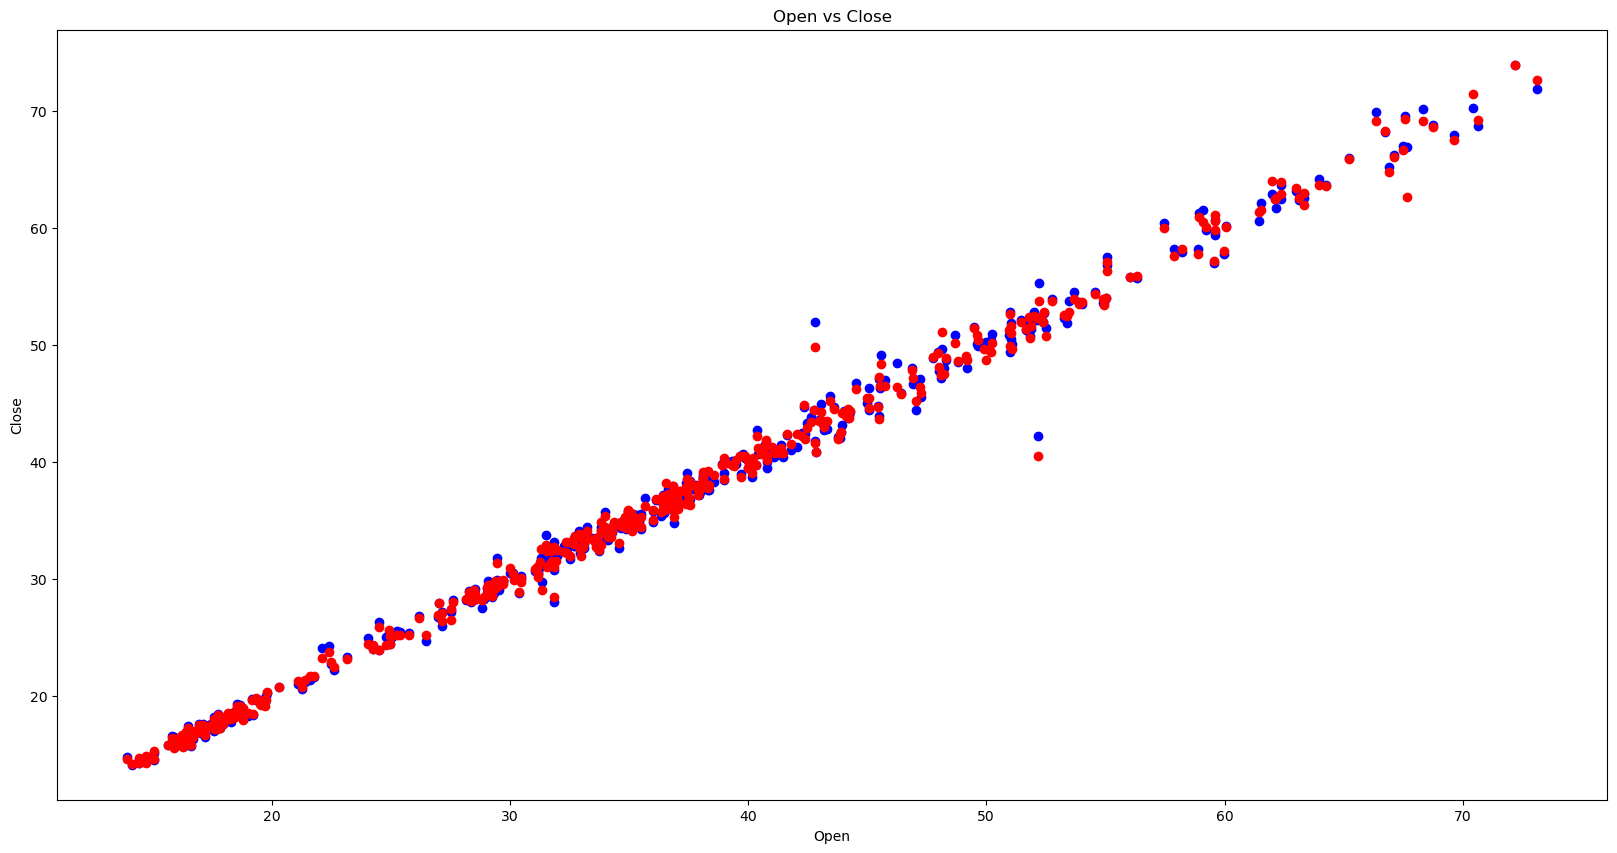

In [328]:
plt.figure(figsize=(20,10))
plt.scatter(X_test.Open,y_test,color='blue')
plt.scatter(X_test.Open,predictions,color='red');
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open vs Close')

This plot shows a good and accurate relationship between the testing values.

## 6. Predictions and Conclusions

In [329]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [330]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.31050700260212566
Mean Squared Error: 0.22713482821074166
Root Mean Squared Error: 0.47658664292103453


In conclusion, we can see that the stock prices for Twitter have been increasing over the years. The stock prices have been increasing since 2016 and have been decreasing since 2021.

We used various machine learning models to predict the stock prices and they all gave a very similar score which shows a reliable trend in the prices.

The model gave a very accurate score of 0.9985225319596106 (98%) which is backed up by the scatter plot. This result was given by the random forest regressor model which proved to be the most accurate model.

The MSE value is also very low (close to 0) which shows that the model is very accurate.

We can also see that the volume of stocks traded has been increasing since 2021 which shows that there is a lot of buying pressure in the market, as well as the open price for 2021 was the highest amongst all other years, with the value decreasing in 2022.